In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
datasetLocation = "Datasets/processedHouse_Price.csv"
# datasetLocation = 'https://raw.githubusercontent.com/mbharti321/dataBank/main/Udemy/House_Price.csv'
df = pd.read_csv(datasetLocation, header=0)
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [3]:
df.shape

(506, 16)

# Simple linear regression

- `y = B0 + B1*X`

In [4]:
import statsmodels.api as sn

In [5]:
#adding B1 into X variable following the formula `y = B1 + B0*X`
x = sn.add_constant(df.room_num)

In [6]:
y = df.price

In [7]:
# ols: ordinary least square
lm = sn.OLS(y, x).fit()

In [8]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           1.31e-74
Time:                        18:02:26   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using `sklearn` library

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
y = df.price

In [11]:
# x will be two dimentional array, why?
x = df[['room_num']]

In [12]:
# craeting Linear regression object
lm2 = LinearRegression()

In [13]:
# fitting the model with x, y data
lm2.fit(x,y)

LinearRegression()

In [14]:
# printing B0 and B1(i.e. intecept, slope)
print(lm2.intercept_, lm2.coef_)

-34.65924312309724 [9.09966966]


In [15]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean

In [16]:
lm2.predict(x)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

In [17]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

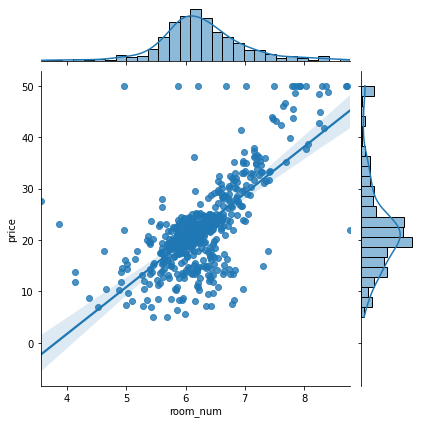

In [18]:
sns.jointplot(x = df.room_num, y= df.price, data = df, kind  ='reg')

# Multi linear regression

- `y = B0 + B1*X1+ B2*X2+ B3*X3+ ..... + Bp*Xp`

In [19]:
x_multi = df.drop('price', axis = 1)

In [20]:
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [21]:
y_multi = df['price']

In [22]:
x_multi_const = sn.add_constant(x_multi)

In [23]:
x_multi_const.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [24]:
# ordinary least quuare
lm_multi = sn.OLS(y_multi, x_multi_const).fit()

In [25]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Wed, 16 Jun 2021   Prob (F-statistic):          4.19e-125
Time:                        18:02:36   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretession

-  **R-squared** value is 0.721, which is pretty good
-  **Prob(F-statistic)** value is very low( e^-125), which leads us to say confidently that our independent variables have some impact on our dependent variable.
-  Degree of freedom: 490; `num. of row - total variables - 1`
- `P>|t|`, the lower the **p-value** (less than 0.05), the more significant the variable for predicting y.

  - Here, variables having lower p-value,

        - air_qual

        - room_num

        - teachers

        - poor_prop

        - avg_dist

        - airport_yes, these are the most significant variables in our model
-  
-  Check the sign of coef of each variable,

        - +ve: (num_num, teachers,airpot_yes) positive impact
        - -ve: (air_qual) negative impact
-  

### MultiRegression using `sklearn` library

In [26]:
# craeting Linear regression object
lm_multi2 = LinearRegression()

In [27]:
lm_multi2.fit(x_multi, y_multi)

LinearRegression()

In [28]:
lm_multi2.intercept_

-6.498625198419646

In [29]:
lm_multi2.coef_ 

array([ 9.70998193e-03, -4.08746495e-02, -1.58973999e+01,  4.01901676e+00,
       -5.71475069e-03,  1.00700068e+00, -5.77271243e-01,  3.29221139e-01,
        9.18675603e-02,  1.61185504e-02, -1.21863952e+00,  1.13151586e+00,
        2.64086064e-01, -6.87555889e-01, -2.91318712e-01])

# `Train-Test` split of dataset

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.1, random_state = 0)
# test_size = 0.2, denotes that we want test dataset is of 20% of our whole data
# random_state = 0, denotes how randomly we want to select observations for test and train 

In [57]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 15) (51, 15) (455,) (51,)


### Training our linear model on `training data`

In [58]:
lm_a = LinearRegression()

In [59]:
lm_a.fit(x_train, y_train)

LinearRegression()

In [60]:
print(lm_a.intercept_, lm_a.coef_)

-10.157863318757833 [-3.30579216e-01 -5.92796466e-02 -1.46765291e+01  4.47271371e+00
 -1.40388881e-02  1.04570168e+00 -4.85348409e-01  2.35362840e-01
  8.05022336e-02  2.92255149e-02 -1.18280876e+00  8.38194283e-01
  3.75532282e-01 -4.46513421e-01  6.76305734e-02]


**Predicting data using trained model**

In [61]:
y_test_a = lm_a.predict(x_test)

In [62]:
y_train_a = lm_a.predict(x_train)

In [63]:
# Getting R-squared value
from sklearn.metrics import r2_score

In [64]:
# r2_score? #->getting help

# on test dataset
r2_score(y_test, y_test_a)

0.44890125762869626

In [65]:
# on train dataset
r2_score(y_train, y_train_a)

0.7475305548409195

### `Interpretation`
- `R2 of 1` indicates that the regression predictions `perfectly fit` the data.
    - `Train dataset` has less variability i.e. the prediction is `better` on train dataset
    - `Test dataset` has higher variability i.e. the prediction is `very less accurate` 